#flipkart product review and rating sentiment analysis

In [ ]:
import pandas as pd #data maipulation
import numpy as np #numerical computing
import matplotlib.pyplot as plt #visualization
import seaborn as sns ##

In [ ]:
df=pd.read_csv(r'/content/Dataset-SA.csv') #read the data

In [ ]:
df.shape  #shape of the data

(205052, 6)

In [ ]:
df.sample(5) #sample view of data

,product_name,product_price,Rate,Review,Summary,Sentiment
23528,BAJAJ Fx11 Food Factory 600 W Food Processor??...,6525,5,worth every penny,nice,positive
83455,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,33990,4,nice product,good,positive
91115,Infinix 10W Quick Charger combo for Infinx dev...,449,5,excellent,best charger and it is also original i am usin...,positive
25734,Google Nest Mini (2nd Gen) with Google Assista...,3499,5,highly recommended,a mind blowing audio product of its kind,positive
149545,Qozent Hand Gloves For Kitchen Dish Washing Co...,199,1,don't waste your money,very bad product,negative


In [ ]:
df.info() #data-type , null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


In [ ]:
df.isnull().sum() #total null values in each colums


,0
product_name,0
product_price,0
Rate,0
Review,24664
Summary,11
Sentiment,0


#data cleaning

In [ ]:
df = df.dropna(subset=['Review'])


#EDA

<Axes: xlabel='Sentiment', ylabel='Rate'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


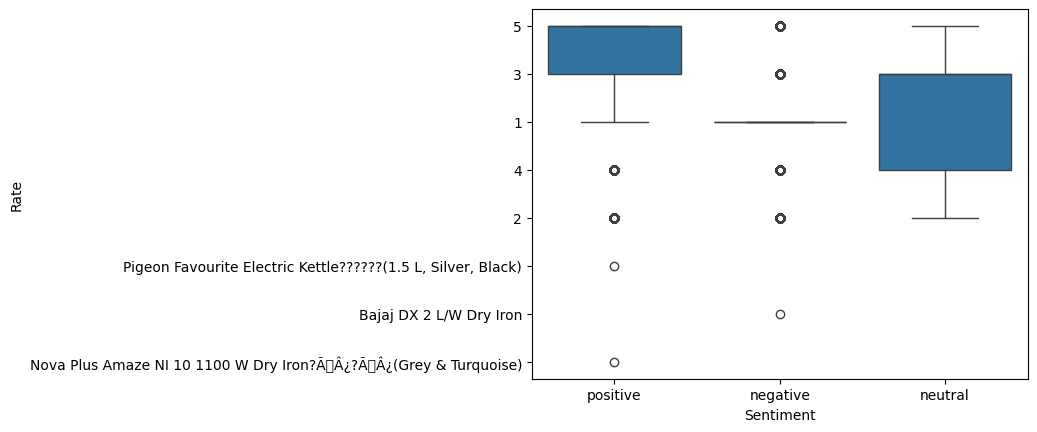

In [ ]:
sns.boxplot(x='Sentiment', y='Rate', data=df)
#whishkers

In [ ]:
df['Rate'].unique() #different values in rate to find exact outliers

array(['5', '3', '1', '4', '2',
       'Pigeon Favourite Electric Kettle??????(1.5 L, Silver, Black)',
       'Bajaj DX 2 L/W Dry Iron',
       'Nova Plus Amaze NI 10 1100 W Dry Iron?Ã\x83Â¿?Ã\x83Â¿(Grey & Turquoise)'],
      dtype=object)

In [ ]:
df = df[df['Rate'].str.strip().str.isdigit()] #removing outliers in rate

In [ ]:
df['Rate'].value_counts() #

,count
Rate,
5,105647
4,36969
1,18294
3,14024
2,5451


<Axes: xlabel='Rate', ylabel='count'>

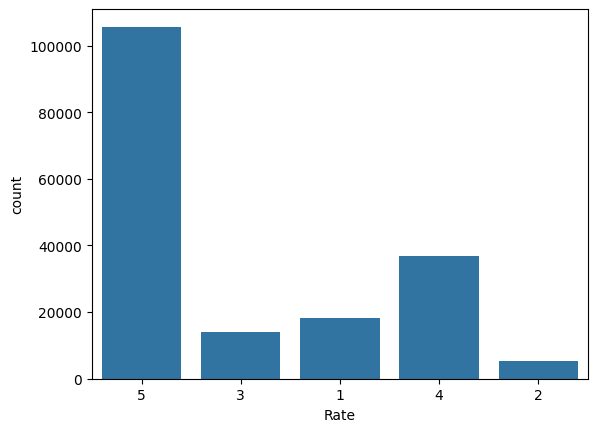

In [ ]:
sns.countplot(x='Rate',data=df) #rate analysis

<Axes: xlabel='Sentiment', ylabel='count'>

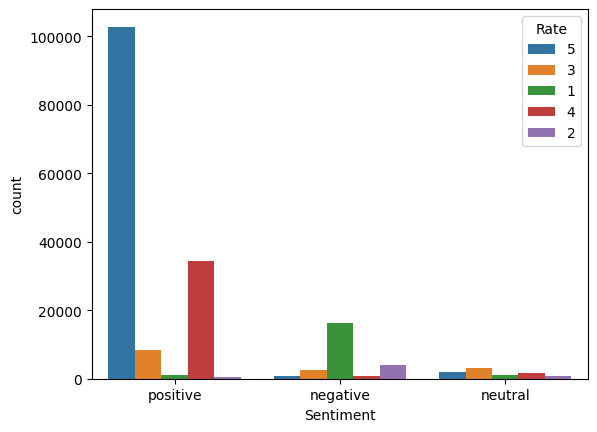

In [ ]:
sns.countplot(x='Sentiment',hue='Rate', data=df) #sentiment vs rate

<Axes: ylabel='count'>

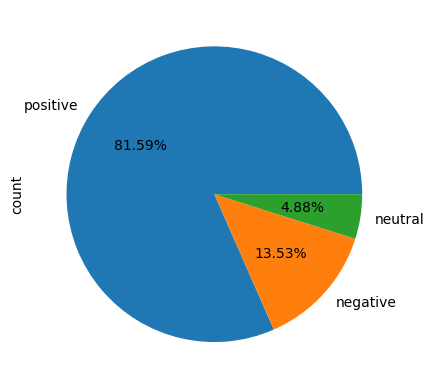

In [ ]:
df['Sentiment'].value_counts().plot(kind='pie',autopct='%.2f%%') #rate percentage

<Axes: ylabel='count'>

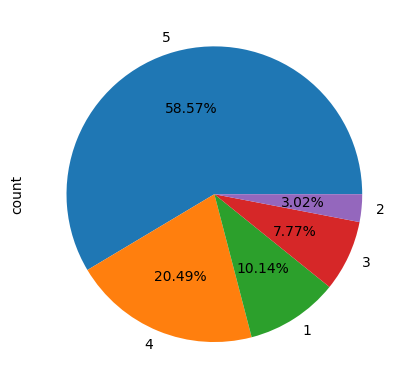

In [ ]:
df['Rate'].value_counts().plot(kind='pie',autopct='%.2f%%')

<Axes: xlabel='Rate'>

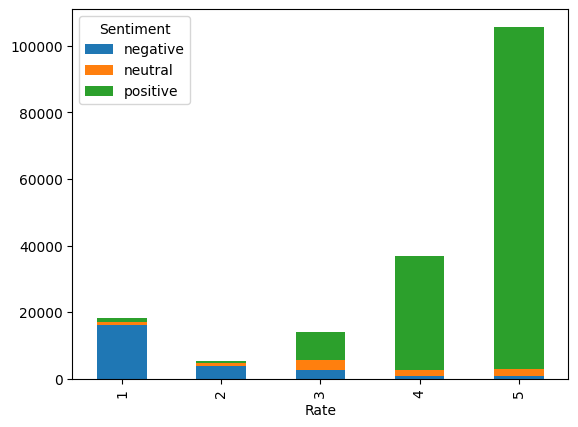

In [ ]:
pd.crosstab(df['Rate'], df['Sentiment']).plot(kind='bar', stacked=True)


text and review analysis

In [ ]:
#A) Review Length
df.loc[:, 'review_length'] = df['Review'].fillna('').apply(lambda x: len(str(x).split()))


In [ ]:
df.sample(3)

,product_name,product_price,Rate,Review,Summary,Sentiment,review_length
199167,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,brilliant,gud quality delivery boy behavior is gud,positive,1
94515,boAt 18W Power WCD QC3A Charger combo Compatib...,449,4,delightful,its overall goodwriting review after 4 months,positive,1
68138,MRF ENDORSED | for Light/Hard Tennis Ball [wit...,499,5,super!,good,positive,1


In [ ]:
df['review_length'].unique() #different values in length of review

array([ 1,  2,  3,  4, 10,  5,  7, 12,  8,  6,  9, 11, 21, 13, 22, 14, 15])

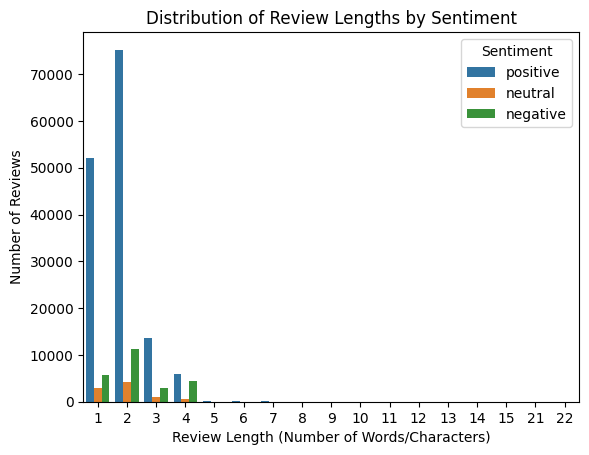

In [ ]:
#sns.countplot(x= 'Sentiment',hue='review_length',data=df)
sns.countplot(x= 'review_length',hue='Sentiment',data=df)
plt.title("Distribution of Review Lengths by Sentiment")
plt.xlabel("Review Length (Number of Words/Characters)")
plt.ylabel("Number of Reviews")
plt.show()


In [ ]:
df['review_length'].value_counts()

,count
review_length,
2,90698
1,60664
3,17484
4,10938
5,184
6,128
7,102
8,58
9,50


In [ ]:
from collections import Counter #import counter class from collection
import nltk #Natural Language Toolkit
nltk.download('stopwords') #doenload stop words
from nltk.corpus import stopwords #

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#len(stopwords.words('english'))

In [ ]:
stop = set(stopwords.words('english'))#set of stop words
len(stop)

198

In [ ]:
#' '.join(df['Review'].dropna())

In [ ]:
words = ' '.join(df['Review'].dropna()).lower().split() #list of words present in reviews
filtered = [w for w in words if w not in stop and w.isalpha()] # seperate out only meaningfull words without stop words
counter_=Counter(filtered)# Counter(filtered) counts how many times each word appears.
counter_.most_common(20)


[('product', 24179),
 ('good', 17430),
 ('awesome', 11289),
 ('purchase', 11021),
 ('terrific', 10952),
 ('nice', 9393),
 ('worth', 9037),
 ('wonderful', 9029),
 ('specified', 8351),
 ('recommended', 6690),
 ('great', 5702),
 ('best', 5654),
 ('brilliant', 5648),
 ('perfect', 5615),
 ('every', 5609),
 ('classy', 5604),
 ('penny', 5604),
 ('simply', 5600),
 ('must', 5592),
 ('excellent', 5584)]

In [ ]:
'''
using the Multinomial Naive Bayes model, which is a variant of the Naive Bayes classifier designed for discrete features like word counts or term frequencies in text classification.
Used For:
Text classification problems (e.g., spam detection, sentiment analysis)

Works well with TF, TF-IDF, or CountVectorizer outputs
'''

'\nText vectorization is the process of converting text data into numerical vectors,\n which are lists of numbers that can be processed by machine learning algorithms.\n This transformation is crucial because most machine learning models require numerical input.\nBy converting text into vectors, we enable computers to understand and analyze human language.\n\n\nis using the Multinomial Naive Bayes model, which is a variant of the Naive Bayes classifier designed for discrete features like word counts or term frequencies in text classification.\nUsed For:\nText classification problems (e.g., spam detection, sentiment analysis)\n\nWorks well with TF, TF-IDF, or CountVectorizer outputs\n'

In [ ]:
#df['Sentiment'].isnull().sum()


In [ ]:
#df.loc['Sentiment']=df.dropna(subset=['Sentiment'])
#df = df.dropna(subset=['Sentiment'])  # Drop rows where review is NaN


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#TF: term frequency, #numer of times words appear
#IDF: checkes how rare words is
from sklearn.model_selection import train_test_split #split data into training and testing
from sklearn.naive_bayes import MultinomialNB #model
from sklearn.metrics import classification_report #eval
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
#Vetorize text
tfidf = TfidfVectorizer(stop_words='english', max_features=5000) #by default none
X = tfidf.fit_transform(df['Review'].astype(str)) #to convert ana to str
y = df['Sentiment']
X #(no of reviews, no of unique words)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 295714 stored elements and shape (180385, 1139)>

In [ ]:

#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
#stratify:prevents biased evaluation

In [ ]:
#Train model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# 4. Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.85      0.71      0.78      4880
     neutral       0.05      0.00      0.00      1762
    positive       0.91      0.99      0.95     29435

    accuracy                           0.90     36077
   macro avg       0.60      0.57      0.58     36077
weighted avg       0.86      0.90      0.88     36077



Accuracy: 0.90


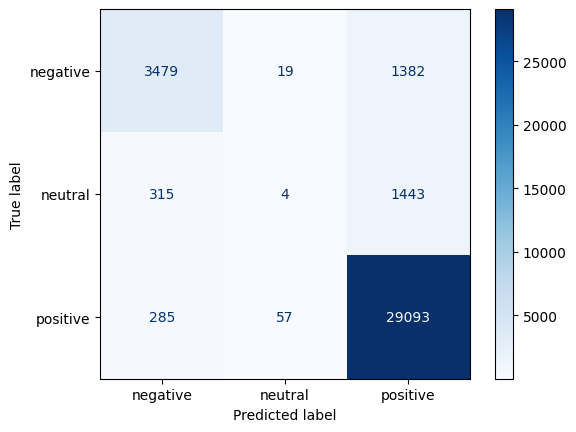

In [ ]:


# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
